In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
process_csv_file = './postprocessing/elements_postprocessing.csv'
element_output = pd.read_csv(process_csv_file)
# print(element_output.columns)

In [3]:
plant_no = 1
axis = 'MS'
metamer = [9,10,11,12]
organ = ['blade']
visualize_columns = ['Photosynthesis', 'PARa', 'Transpiration', 'Ts']

In [4]:
blade_outputs = element_output.groupby(by = ['plant', 'axis', 'metamer', 'organ']).apply(lambda grouped: grouped[grouped['organ']=='blade'])


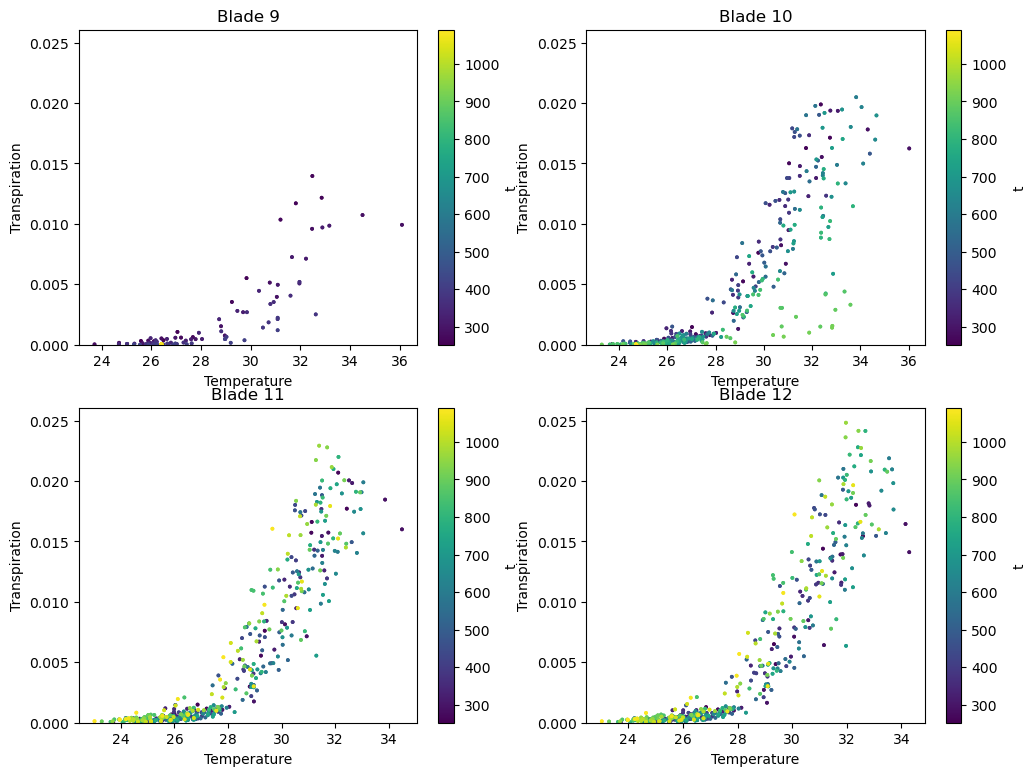

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))
for i in range(0,4):
    x_column = 'Ts'
    y_column = 'Transpiration'
    x_label = 'Temperature'
    min_value = blade_outputs[y_column].min()*0.95
    max_value = blade_outputs[y_column].max()*1.05
    blad_to_plot = blade_outputs[blade_outputs['metamer']==i+9]\
    [['t', 'Photosynthesis', 'PARa', 'Transpiration', 'Ts']].plot.scatter(x=x_column, y=y_column, s=3, c='t', xlabel=x_label,\
                                                                          title='Blade '+str(i+9), \
                                                                          cmap='viridis', ylim=[min_value, max_value], ax=axes[i//2, i%2])

plt.savefig('Blade Temperature-Transpiration')